# Visão geral  sobre taxa de suícidio

Amostra coletada de : https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

Segundo a fonte da informação, esses dados foram sendo agrupado de 1985 a 2016,oportanto, conforme esse dataset esta sendo analisado em 2021, os valores que aqui representarmosnão representaram a realizadade atual.
Fram agrupados informações estatísticas sobre casos de suícidio de diversos países até a data em questão

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Dataset\master.csv', sep=',')

In [4]:
df.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X


Para iniciarmos nossos estudos, iremos garimpar algumas colunas de nossa tabala para simplificar a visualização

In [5]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
df.drop(['suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)', ' gdp_for_year ($) '], axis = 1, inplace = True)

In [7]:
df.head(5)

,country,year,sex,age,suicides_no,population,country-year,generation
0,Albania,1987,male,15-24 years,21,312900,Albania1987,Generation X
1,Albania,1987,male,35-54 years,16,308000,Albania1987,Silent
2,Albania,1987,female,15-24 years,14,289700,Albania1987,Generation X
3,Albania,1987,male,75+ years,1,21800,Albania1987,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,Albania1987,Boomers


In [8]:
len(df['country'].unique())

101

O DataSet, conforme informação acima, coletou dados de 101 paíse

Agora veremos os 10 primeiros país com maior quantidade de entradas nessa planilha

In [9]:
df['country'].value_counts().head(10)

Iceland          382
Netherlands      382
Austria          382
Mauritius        382
Luxembourg       372
Argentina        372
Brazil           372
Colombia         372
United States    372
Spain            372
Name: country, dtype: int64

Os valores acima somente demonstram a quantidade de vezes que um país foi listado, o que pode indicar qual país mais tem entradas em diferentes classificações de suícidio.
Desse primeiro ponto de vista, as Ilhas Maurício lideram.

Iremos agrupar esse essas informação por país, para que possamos ter uma visão melhor

In [10]:
grupoPais = df.groupby('country')

In [11]:
index = list(range(1, 11))
index

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [12]:
pd.DataFrame(grupoPais['suicides_no'].mean().sort_values(ascending = False).head(10))

,suicides_no
country,
Russian Federation,3733.771605
United States,2779.604839
Japan,2169.091398
Ukraine,952.232143
Germany,933.532051
France,914.241667
Republic of Korea,703.575269
Brazil,609.174731
Poland,482.979167


A partir da lista acima, fizemos um agrupamento por país e tiramos uma média da coluna "suicide_no" (numero de suicidios), nesse caso, a média contabilizo todos os números de de suícidio, idependente da faixa etária, e ja pudemos visualizar um cenário bem diferente, onde a Russia lidere com folga, seguido de Estados e japão.
Outro ponto a ser observado, é o que o Brasil está em 8° lugar nessa lista

In [13]:
df

,country,year,sex,age,suicides_no,population,country-year,generation
0,Albania,1987,male,15-24 years,21,312900,Albania1987,Generation X
1,Albania,1987,male,35-54 years,16,308000,Albania1987,Silent
2,Albania,1987,female,15-24 years,14,289700,Albania1987,Generation X
3,Albania,1987,male,75+ years,1,21800,Albania1987,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,Albania1987,Boomers
...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,Uzbekistan2014,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,Uzbekistan2014,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,Uzbekistan2014,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,Uzbekistan2014,Generation Z


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupamento por sexo

<AxesSubplot:title={'center':'Taxa de suícido por sexo ao passsar dos anos'}, xlabel='Anos', ylabel='sex'>

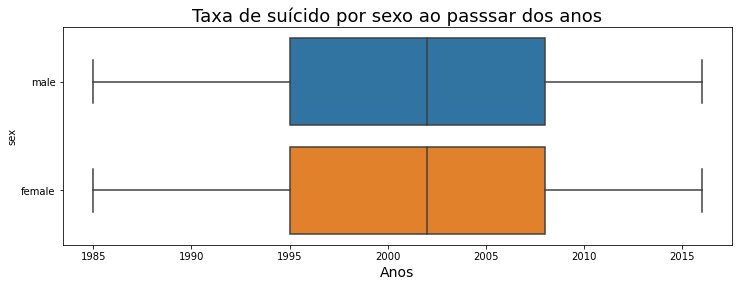

In [15]:
ax = sns.boxplot( x = 'year', y = 'sex', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Taxa de suícido por sexo ao passsar dos anos', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

<AxesSubplot:title={'center':'Taxa de suícido por sexo por e quantidade'}, xlabel='Quantidade', ylabel='sex'>

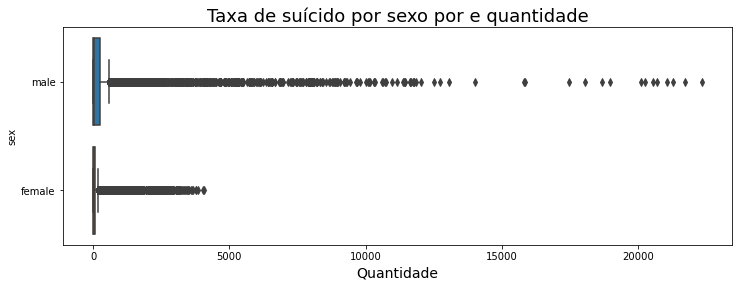

In [16]:
ax = sns.boxplot( x = 'suicides_no', y = 'sex', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Taxa de suícido por sexo por e quantidade', fontsize=18)
ax.set_xlabel('Quantidade', fontsize=14)
ax

In [17]:
grupoSexo = df.groupby('sex')

In [18]:
grupoSexo['suicides_no'].sum()

sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64

In [19]:
proporcao = ((5188910 - 1559510) / 1559510) * 100
proporcao

232.72694628440985

<AxesSubplot:ylabel='sex'>

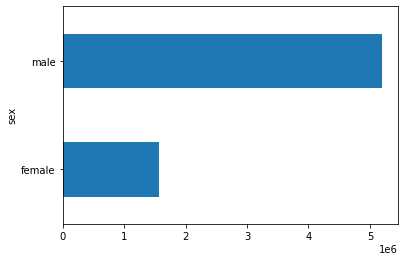

In [20]:
grupoSexo['suicides_no'].sum().plot.barh()

Acima pudemos ver claramente que a dominancia esmagadora na quantidade de total de suícidos é masculina, chegando ser 232,72% maior que a taxa da mulheres

agora iremos analisar o o desvio padrão para cada sexo

Gostariamos de lembrar que o desvio padrão nada mais é do que o quanto em média 

In [21]:
grupoSexo['suicides_no'].std()

sex
female     333.491224
male      1217.448508
Name: suicides_no, dtype: float64

<AxesSubplot:xlabel='sex'>

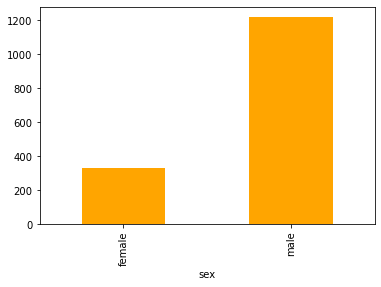

In [22]:
grupoSexo['suicides_no'].std().plot.bar(color = 'orange')

# Agrupamento por faixa etária

In [23]:
grupoFaixa = df.groupby('age')

In [24]:
grupoFaixa.groups.keys()

dict_keys(['15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years'])

<AxesSubplot:ylabel='age'>

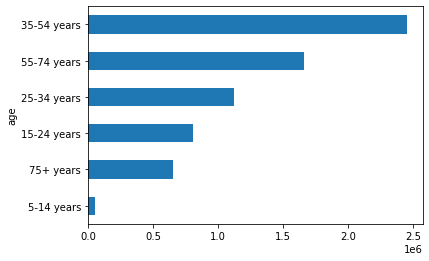

In [25]:
grupoFaixa['suicides_no'].sum().sort_values(ascending = True).plot.barh()

E agora pudemos definir que a faixa etária com a maior quantidade de casos é entre 35 a 54 anos

# Agrupamento por geração

In [26]:
df

,country,year,sex,age,suicides_no,population,country-year,generation
0,Albania,1987,male,15-24 years,21,312900,Albania1987,Generation X
1,Albania,1987,male,35-54 years,16,308000,Albania1987,Silent
2,Albania,1987,female,15-24 years,14,289700,Albania1987,Generation X
3,Albania,1987,male,75+ years,1,21800,Albania1987,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,Albania1987,Boomers
...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,Uzbekistan2014,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,Uzbekistan2014,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,Uzbekistan2014,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,Uzbekistan2014,Generation Z


In [27]:
grupoGeracao = df.groupby('generation')

In [28]:
grupoGeracao['suicides_no'].sum()

generation
Boomers            2284498
G.I. Generation     510009
Generation X       1532804
Generation Z         15906
Millenials          623459
Silent             1781744
Name: suicides_no, dtype: int64

<AxesSubplot:ylabel='generation'>

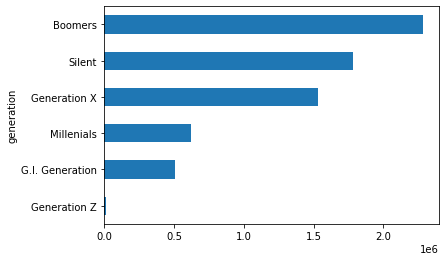

In [29]:
grupoGeracao['suicides_no'].sum().sort_values(ascending = True).plot.barh()

Ao que pudermos analisar, a gereção boomers liderou o ranking, poré, Quem são os Baby Boomers? 
 

Os Baby Boomers são os nascidos entre 1945 e 1964. O termo, em inglês, se refere ao boom demográfico ocorrido nos Estados Unidos durante esse período.

# Agrupapamento por população

Antes de iniciarmos as comarações por polação,  iremos saliente que, faremos comparativo com um somatório da população de cada país, considerando todos os anos em que foi registrado, pois, conforme podemos perceber, o este DataSet apresenta uma quantidade de uma população de acordo com o ano, então, temos números de de população diferente para a um mesmo país, porém, para anos diferentes, conforme apresentado abaixo

In [30]:
pd.DataFrame (df[['country']].value_counts().head(20), columns = ['Numero de vezes que aparece na lista'])

,Numero de vezes que aparece na lista
country,
Mauritius,382
Austria,382
Netherlands,382
Iceland,382
Brazil,372
Singapore,372
Ecuador,372
Spain,372
Puerto Rico,372


In [31]:
grupoPopulacao = df.groupby('population')

In [32]:
df.head(5)

,country,year,sex,age,suicides_no,population,country-year,generation
0,Albania,1987,male,15-24 years,21,312900,Albania1987,Generation X
1,Albania,1987,male,35-54 years,16,308000,Albania1987,Silent
2,Albania,1987,female,15-24 years,14,289700,Albania1987,Generation X
3,Albania,1987,male,75+ years,1,21800,Albania1987,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,Albania1987,Boomers


In [33]:
grupoPopulacao[['suicides_no','country']].sum().sort_values(by = 'population',ascending = False).head(10)

,suicides_no
population,
43805214,3376
43607902,3525
43509335,3209
43240905,3399
43139910,10641
43002471,11371
42997878,3058
42992076,10978
42957716,3058


<AxesSubplot:ylabel='population'>

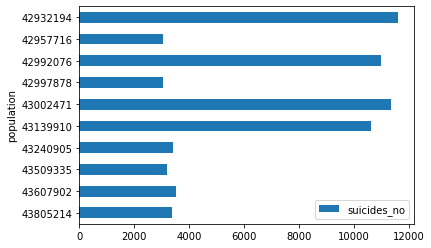

In [34]:
grupoPopulacao[['suicides_no','country']].sum().sort_values(by = 'population',ascending = False).head(10).plot.barh()

Aqui já podemos observar um comportamento peculiar
è esperado que os países mais populosos seja os que tenham as maiores quantidades de registros de suícidos, porém, não é bem o que acontece nos dados acima

In [35]:
grupoPais['population','suicides_no'].sum().sort_values(by = 'suicides_no', ascending = False).head(20)

<ipython-input-35-6a666d2f5781>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grupoPais['population','suicides_no'].sum().sort_values(by = 'suicides_no', ascending = False).head(20)


,population,suicides_no
country,,
Russian Federation,3690802620,1209742
United States,8054027201,1034013
Japan,3681024844,806902
France,1670756775,329127
Ukraine,1286469184,319950
Germany,2024875612,291262
Republic of Korea,1354944936,261730
Brazil,4856093548,226613
Poland,866180029,139098


Na comparação acima, podemos associar que um país com uma população maior, induz uma quantidade maior de casos, mas não é um regra.

# Agrupamento por ano

iremos verificar quais anos tivemos os maiores registros de suicídio

In [36]:
grupoAno = df.groupby('year')

In [37]:
pd.DataFrame(grupoAno['suicides_no'].sum().sort_values(ascending = False))

,suicides_no
year,
1999,256119
2002,256095
2003,256079
2000,255832
2001,250652
1998,249591
1996,246725
1995,243544
2009,243487


Conforme o DataSet que eleboramos acima, pudemos perceber que o anos onde mais se houve numero de suícido foi o de 1999.
Havía sido confirmado anteriormente que, a geração onde mais se registra casos de suícido, é a geração dos Boomers. que se datava entra 1946 a 1964.
A geração boomer, no ano de 1999, teriam entre 35 a 53 anos de idade.
qunado análisemos por faixa etária, haviamos notado que a taxa de suícidio era entre pessoas de 35 a 54 anos.
Nesse, pudemos validar de forma consistente como os dados sobre suídio apresentam um determinado padrão onde o risco é maior

Segundo a análise feita do DataSet em questão, foi o de 2016.
A diferença do anos onde houve mais suicídios e o anos onde teve menos, é de 15.000% aproximadamente

In [38]:
pd.DataFrame(grupoAno['suicides_no'].aggregate( ['max','sum']).sort_values(by = 'max', ascending = False))

,max,sum
year,,
1994,22338,232063
1995,21706,243544
2001,21262,250652
2000,21063,255832
1999,20705,256119
1996,20562,246725
1993,20256,221565
2002,20119,256095
1997,18973,240745


# Uma análise somente do Brasil

In [70]:
df[['country','suicides_no','year']].query("country == 'Brazil'").sort_values(by = 'suicides_no', ascending = False).head(1)

,country,suicides_no,year
4534,Brazil,3238,2015


In [71]:
df[['country','suicides_no','year']].query("country == 'Brazil'").sort_values(by = 'suicides_no', ascending = True).head(1)

,country,suicides_no,year
4219,Brazil,25,1988


Segundo o dataset, o Ano em que o Brasil registrou o maior numero de suídios, foi em 2015, realizando 3238 registros de suicídio
Em contrapartida, o ano em que o Brasil registro o menor número de suicídios, foi em 1988, realizando apenas 25 registros
A diferença percentual é de um aumento de inacreditáveis 12.852%

In [75]:
df[['country','suicides_no','year']].sort_values(by = 'suicides_no', ascending = False).head(1)

,country,suicides_no,year
20996,Russian Federation,22338,1994


O país mais teve registros em um único ano, foi a Russia, realizando 22.338 registros no ano de 1994.
Em comparação ao máximo do Brasil, esse valor é 589,87% maior.

In [85]:
df[['country','suicides_no']].query("country == 'Brazil'").sum()[1]

226613

De de 1985 a 2016, o Brasil registrou um total de 226613 Caso de suícidio

In [98]:
df2 = df[['country','suicides_no','year']].query("country == 'Brazil'")
df2

,country,suicides_no,year
4172,Brazil,129,1985
4173,Brazil,535,1985
4174,Brazil,1011,1985
4175,Brazil,791,1985
4176,Brazil,661,1985
...,...,...,...
4539,Brazil,466,2015
4540,Brazil,89,2015
4541,Brazil,397,2015
4542,Brazil,79,2015


C:\Users\fqueirox\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='suicides_no', ylabel='Density'>

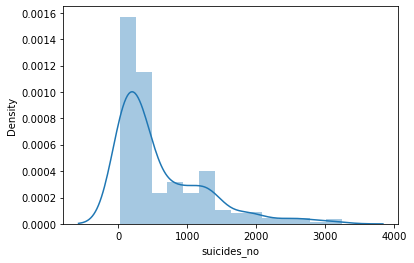

In [99]:
ax1 = sns.distplot(df2['suicides_no']) 
ax1

A distribuição de suícidio no Brasil se assemelham ao que chamamos de "distribuição paranormal a direita" ou seja, ela não é simétrica, e pudemos perceber uma baixa significativa

In [105]:
df2['suicides_no'].mean()

609.1747311827957

In [106]:
df2['suicides_no'].std()

652.5670967401788

A média de mortes por suicídio por ano no Brasil por ano é 609 caso, e, o desvio padrão é de 652.
Como estamos lidando como uma distribuição paranormal, é esperado que essa medida de dispersão não representasse bem a essa população

In [107]:
df2['suicides_no'].median()

348.0

A media da nossa distribuição é 348, esse é o valor central da distribuição, ou seja, representa o valor exato onde metade dos valores estao abaixo ou acima do mesmo.

# Utilização de regressão linear para predição de suícidios no Brasil

In [108]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [133]:
df.head(2)

,country,year,sex,age,suicides_no,population,country-year,generation
0,Albania,1987,male,15-24 years,21,312900,Albania1987,Generation X
1,Albania,1987,male,35-54 years,16,308000,Albania1987,Silent


In [135]:
df3 = df[['country','suicides_no','year','population']].query("country == 'Brazil'")
df3.head(1)

,country,suicides_no,year,age,population
4172,Brazil,129,1985,75+ years,840300


In [180]:
x = df3[['year','population']]
y = df3[['suicides_no','year']]

In [181]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [182]:
rgs = linear_model.LinearRegression(fit_intercept=False, normalize=True)

In [183]:
rgs.fit(x_treino, y_treino)

LinearRegression(fit_intercept=False, normalize=True)

In [186]:
rgs.score(x_teste, y_teste)

0.568173710147932

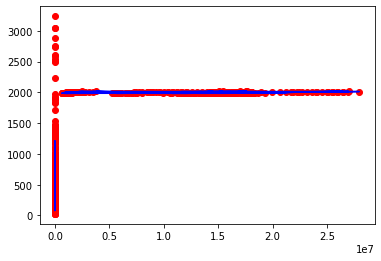

In [185]:
import matplotlib.pyplot as mpt
mpt.scatter(x_treino, y_treino, color='red')
mpt.plot(x_treino, rgs.predict(x_treino), color = 'blue')
mpt.show()